In [1]:
import json

with open('papers.json', 'r', encoding='utf-8') as f:
    papers_a_autores = json.load(f)
    
print(f"✅ Se cargaron {len(papers_a_autores)} papers")
print("Ejemplo del primer paper:", list(papers_a_autores.items())[0])

✅ Se cargaron 76 papers
Ejemplo del primer paper: ('A_New_Hope_for_Obscured_AGN_The_PRIMA-NewAthena_Alliance.pdf', ['Luigi Barchiesi', 'F. J. Carrera', 'C. Vignali', 'F. Pozzi', 'L. Marchetti', 'C. Gruppioni', 'I. Delvecchio', 'L. Bisigello', 'F. Calura', 'J. Aird', 'M. Vaccari'])


In [3]:
from collections import Counter

colaboraciones = Counter()
for paper1, authors1 in papers_a_autores.items():
    for paper2, authors2 in papers_a_autores.items():
        if paper1 != paper2:
            comunes = set(authors1) & set(authors2)
            if comunes:
                colaboraciones[(paper1, paper2)] = len(comunes)

print(f"Total de conexiones entre papers: {len(colaboraciones)}")
print("Top conexiones:")
for (p1, p2), count in colaboraciones.most_common(5):
    print(f"{p1} ↔ {p2}: {count} autores en común")

Total de conexiones entre papers: 2
Top conexiones:
Learning_to_chain-of-thought_with_Jensen's_evidence_lower_bound.pdf ↔ RL-finetuning_LLMs_from_on-_and_off-policy_data_with_a_single_algorithm.pdf: 2 autores en común
RL-finetuning_LLMs_from_on-_and_off-policy_data_with_a_single_algorithm.pdf ↔ Learning_to_chain-of-thought_with_Jensen's_evidence_lower_bound.pdf: 2 autores en común


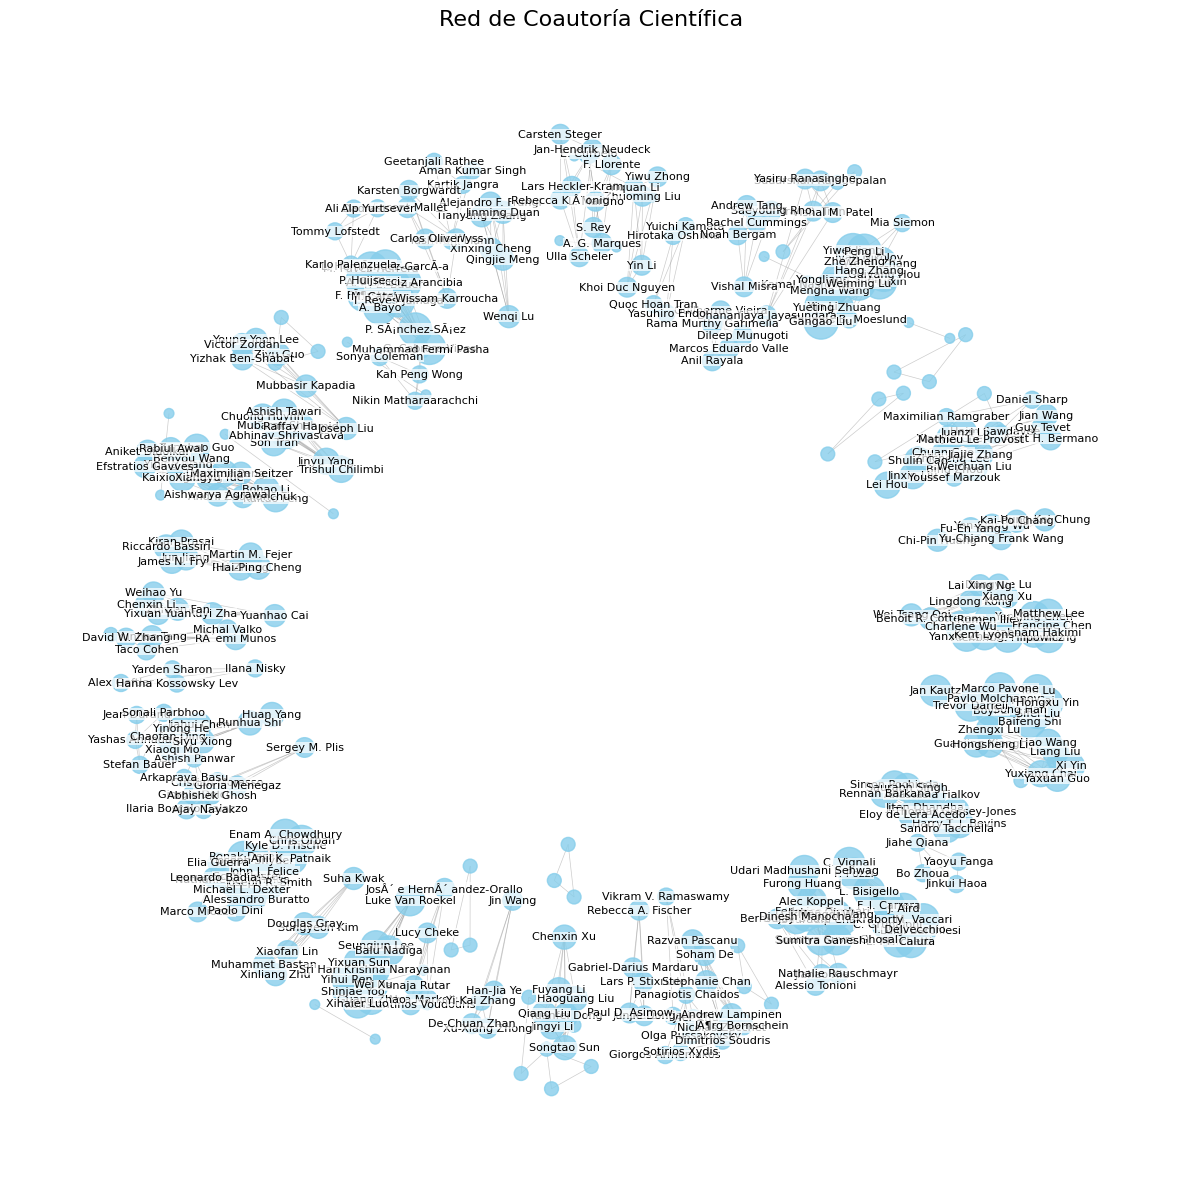

In [19]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

with open('papers.json') as f:
    papers_data = json.load(f)

G = nx.Graph()

for paper, authors in papers_data.items():
    for autor1, autor2 in combinations(authors, 2):
        if G.has_edge(autor1, autor2):
            G[autor1][autor2]['weight'] += 1
        else:
            G.add_edge(autor1, autor2, weight=1)

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.2, iterations=50)  

node_degrees = dict(G.degree())
edge_weights = [G[u][v]['weight']*0.5 for u,v in G.edges()]

nx.draw_networkx_nodes(
    G, pos,
    node_size=[v * 50 for v in node_degrees.values()],
    node_color='skyblue',
    alpha=0.8
)

nx.draw_networkx_edges(
    G, pos,
    width=edge_weights,
    edge_color='gray',
    alpha=0.4
)

for node, (x, y) in pos.items():
    if node_degrees[node] > 2:  
        plt.text(
            x, y, node,
            fontsize=8,
            ha='center',
            va='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=0.2)
        )

plt.title("Red de Coautoría Científica", fontsize=16)
plt.axis('off')

plt.savefig('red_coautoria.png', dpi=300, bbox_inches='tight')
plt.show()



In [2]:
import json
import networkx as nx
from itertools import combinations
from pyvis.network import Network

def clean_text(text):
    return text.encode('ascii', 'ignore').decode('ascii') if not text.isascii() else text

with open('papers.json', encoding='utf-8') as f:
    papers_data = json.load(f)

G = nx.Graph()

for paper, authors in papers_data.items():
    for autor1, autor2 in combinations(authors, 2):
        autor1_clean = clean_text(autor1)
        autor2_clean = clean_text(autor2)
        
        if G.has_edge(autor1_clean, autor2_clean):
            G[autor1_clean][autor2_clean]['weight'] += 1
        else:
            G.add_edge(autor1_clean, autor2_clean, weight=1)

net = Network(
    height="800px",
    width="100%",
    bgcolor="#ffffff",
    font_color="#333333",
    notebook=True, 
    cdn_resources='remote'
)


net.force_atlas_2based(
    gravity=-50,
    central_gravity=0.01,
    spring_length=150,
    damping=0.4
)


for node in G.nodes():
    net.add_node(
        node,
        label=node,
        size=G.degree(node)*0.7 + 10,
        title=f"Colaboraciones: {G.degree(node)}",
        color="#4B8BBE"
    )

for edge in G.edges(data=True):
    net.add_edge(
        edge[0],
        edge[1],
        value=edge[2]['weight'],
        title=f"Papers juntos: {edge[2]['weight']}",
        color="#555555",
        width=edge[2]['weight']*0.5
    )


try:
    html = net.generate_html()
    with open("red_coautoria_interactiva.html", "w", encoding="utf-8") as f:
        f.write(html)
    print("\n Gráfico guardado como 'red_coautoria_interactiva.html'")
except Exception as e:
    print(f"\n Error al guardar: {str(e)}")
    print("Intentando método alternativo...")
    net.save_graph("red_coautoria_interactiva.html")
    print(" Guardado con método alternativo")



 Gráfico guardado como 'red_coautoria_interactiva.html'


In [4]:
import json
import networkx as nx
from itertools import combinations

with open('papers.json') as f:
    papers_data = json.load(f)

G = nx.Graph()
for paper, authors in papers_data.items():
    for autor1, autor2 in combinations(authors, 2):
        if G.has_edge(autor1, autor2):
            G[autor1][autor2]['weight'] += 1
        else:
            G.add_edge(autor1, autor2, weight=1)

for node in G.nodes():
    G.nodes[node]['degree'] = G.degree(node)  

nx.write_gexf(G, 'red_coautoria.gexf')